### Consumo API

In [3]:
import requests
import json
import pandas as pd
import sqlite3
import os

# Diretório onde o arquivo será salvo
directory = "datasets"

# Verifica se o diretório já existe, caso contrário, cria o diretório
if not os.path.exists(directory):
    os.makedirs(directory)

class etBcb:
    def __init__(self, api_link):
        self.api_link = api_link
        self.dados = None
        self.df = None

    def requisicao_api(self):
        """Método GET para a API e armazenar a resposta."""
        try:
            resposta = requests.get(self.api_link)
            if resposta.status_code == 200:
                self.dados = resposta.json()
                print('Status Code:', resposta.status_code)
            else:
                print('Erro na requisição. Status Code:', resposta.status_code)
        except Exception as e:
            print('Erro ao fazer a requisição:', e)

    def transformar_dados(self, chave_json):
        """Método para transformar os dados JSON em um DataFrame pandas."""
        if self.dados:
            try:
                data = self.dados[chave_json]
                self.df = pd.json_normalize(data)
                print('Transformação concluída.')
            except KeyError:
                print(f'Chave "{chave_json}" não encontrada nos dados JSON.')
            except Exception as e:
                print('Erro ao transformar os dados:', e)
        else:
            print('Nenhum dado para transformar.')

    def salvar_sqlite(self, nome_tabela):
        """Método para salvar o DataFrame transformado em um banco de dados SQLite."""
        nome_banco = 'Fecomdb.db'
        if self.df is not None:
            try:
                conexao = sqlite3.connect(nome_banco)
                self.df.to_sql(nome_tabela, conexao, if_exists='replace', index=False)
                conexao.close()
                print(f'Dados salvos na tabela "{nome_tabela}" do banco de dados "{nome_banco}".')
            except Exception as e:
                print('Erro ao salvar os dados no banco de dados SQLite:', e)
        else:
            print('Nenhum dado para salvar no banco de dados.')

    def salvar_json(self, nome_arquivo):
        """Método para salvar os dados extraídos em um arquivo JSON."""
        if self.dados is not None:
            try:
                with open(f'datasets/{nome_arquivo}', 'w') as f:
                    json.dump(self.dados, f)
                print(f'Dados salvos no arquivo JSON: {nome_arquivo}')
            except Exception as e:
                print('Erro ao salvar o JSON:', e)
        else:
            print('Nenhum dado no JSON.')

    def salvar_csv(self, nome_arquivo):
        """Método para salvar o DataFrame em um arquivo CSV."""
        if self.df is not None:
            try:
                self.df.to_csv(f'datasets/{nome_arquivo}', sep=';', decimal= ",", encoding='utf-8-sig')
                print(f'Dados salvos no arquivo CSV: {nome_arquivo}')
            except Exception as e:
                print('Erro ao salvar o CSV:', e)
        else:
            print('Nenhum dado no CSV.')

### Criando a tabela



In [ ]:
#Estatisticas de meios de pagamentos Trimestrais


url = "https://olinda.bcb.gov.br/olinda/servico/MPV_DadosAbertos/versao/v1/odata/MeiosdePagamentosTrimestralDA(trimestre=@trimestre)?@trimestre='20201'&$top=100000&$format=json&$select=datatrimestre,valorPix,valorTED,valorTEC,valorCheque,valorBoleto,valorDOC,valorCartaoCredito,valorCartaoDebito,valorCartaoPrePago,valorTransIntrabancaria,valorConvenios,valorDebitoDireto,valorSaques,quantidadePix,quantidadeTED,quantidadeTEC,quantidadeCheque,quantidadeBoleto,quantidadeDOC,quantidadeCartaoCredito,quantidadeCartaoDebito,quantidadeCartaoPrePago,quantidadeTransIntrabancaria,quantidadeConvenios,quantidadeDebitoDireto,quantidadeSaques"

# Instanciar a classe ETL com o link da API
etl = etBcb(url)

# Executar o método de requisição para extrair os dados da API
etl.requisicao_api()

# Transformar os dados extraídos em um DataFrame pandas
etl.transformar_dados('value')

# Salvar o DataFrame transformado no banco de dados SQLite
etl.salvar_sqlite('EstatisticaDeMeiosDePagamentosTRIMES')

# Salvar o DataFrame em um arquivo CSV
etl.salvar_csv('PagamentosTrimes.csv')

Status Code: 200
Transformação concluída.
Dados salvos na tabela "EstatisticaDeMeiosDePagamentosTRIMES" do banco de dados "Fecomdb.db".
Dados salvos no arquivo CSV: PagamentosTrimes.csv


In [ ]:
#Estatisticas de meios de pagamentos Mensais


url = "https://olinda.bcb.gov.br/olinda/servico/MPV_DadosAbertos/versao/v1/odata/MeiosdePagamentosMensalDA(AnoMes=@AnoMes)?@AnoMes='202001'&$top=100000&$format=json&$select=AnoMes,quantidadePix,valorPix,quantidadeTED,valorTED,quantidadeTEC,valorTEC,quantidadeCheque,valorCheque,quantidadeBoleto,valorBoleto,quantidadeDOC,valorDOC"

# Instanciar a classe ETL com o link da API
etl = etBcb(url)

# Executar o método de requisição para extrair os dados da API
etl.requisicao_api()

# Transformar os dados extraídos em um DataFrame pandas
etl.transformar_dados('value')

# Salvar o DataFrame transformado no banco de dados SQLite
etl.salvar_sqlite('EstatisticaDeMeiosDePagamentosMES')

# Salvar o DataFrame em um arquivo CSV
etl.salvar_csv('meios_de_pagamentos_mensais.csv')

Status Code: 200
Transformação concluída.
Dados salvos na tabela "EstatisticaDeMeiosDePagamentosMES" do banco de dados "Fecomdb.db".
Dados salvos no arquivo CSV: meios_de_pagamentos_mensais.csv


In [ ]:
#Estoque e transações de cartões


url = "https://olinda.bcb.gov.br/olinda/servico/MPV_DadosAbertos/versao/v1/odata/Quantidadeetransacoesdecartoes(trimestre=@trimestre)?@trimestre='20201'&$top=100000&$format=json&$select=trimestre,nomeBandeira,nomeFuncao,produto,qtdCartoesEmitidos,qtdCartoesAtivos,qtdTransacoesNacionais,valorTransacoesNacionais,qtdTransacoesInternacionais,valorTransacoesInternacionais"

# Instanciar a classe ETL com o link da API
etl = etBcb(url)

# Executar o método de requisição para extrair os dados da API
etl.requisicao_api()

# Salvar os dados extraídos em um arquivo JSON
etl.salvar_json('resultado.json')

# Transformar os dados extraídos em um DataFrame pandas
etl.transformar_dados('value')

# Salvar o DataFrame transformado no banco de dados SQLite
etl.salvar_sqlite('TransacoesCartoes')

# Salvar o DataFrame em um arquivo CSV
etl.salvar_csv('transacoes_cartoes.csv')

Status Code: 200
Dados salvos no arquivo JSON: resultado.json
Transformação concluída.
Dados salvos na tabela "TransacoesCartoes" do banco de dados "Fecomdb.db".
Dados salvos no arquivo CSV: transacoes_cartoes.csv


In [ ]:
df = pd.read_csv('datasets/transacoes_cartoes.csv', sep=';')

# Função para converter o formato de trimestre para data
def trimestre_para_data(trimestre):
    ano = int(str(trimestre)[:4])
    trimestre_num = int(str(trimestre)[-1])
    # Ajustando o mês para o início de cada trimestre
    mes = (trimestre_num - 1) * 3 + 1
    return pd.to_datetime(str(ano) + '-' + str(mes) + '-01')

# Aplicando a função ao DataFrame
df['trimestre'] = df['trimestre'].apply(trimestre_para_data)
df.to_csv('datasets/Transacoes_cartões2.csv', sep=';', decimal=',')

In [ ]:
#Expectativa de mercado mensais


url = "https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/odata/ExpectativaMercadoMensais?$top=100000&$format=json&$select=Indicador,Data,DataReferencia,Media,Mediana,DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo"

# Instanciar a classe ETL com o link da API
etl = etBcb(url)

# Executar o método de requisição para extrair os dados da API
etl.requisicao_api()

# Salvar os dados extraídos em um arquivo JSON
etl.salvar_json('resultado.json')

# Transformar os dados extraídos em um DataFrame pandas
etl.transformar_dados('value')

# Salvar o DataFrame transformado no banco de dados SQLite
etl.salvar_sqlite('ExpecMercadoMensais')

# Salvar o DataFrame em um arquivo CSV
etl.salvar_csv('expectativa_mercado_mensais.csv')

Status Code: 200
Dados salvos no arquivo JSON: resultado.json
Transformação concluída.
Dados salvos na tabela "ExpecMercadoMensais" do banco de dados "Fecomdb.db".
Dados salvos no arquivo CSV: expectativa_mercado_mensais.csv


In [ ]:
#Expectativa de mercado selic


url = "https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/odata/ExpectativasMercadoSelic?$top=100000&$format=json&$select=Indicador,Data,Reuniao,Media,Mediana,DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo"

# Instanciar a classe ETL com o link da API
etl = etBcb(url)

# Executar o método de requisição para extrair os dados da API
etl.requisicao_api()

# Salvar os dados extraídos em um arquivo JSON
etl.salvar_json('resultado.json')

# Transformar os dados extraídos em um DataFrame pandas
etl.transformar_dados('value')

# Salvar o DataFrame transformado no banco de dados SQLite
etl.salvar_sqlite('ExpecMercadoSelic')

# Salvar o DataFrame em um arquivo CSV
etl.salvar_csv('expectativa_mercado_selic.csv')

Status Code: 200
Dados salvos no arquivo JSON: resultado.json
Transformação concluída.
Dados salvos na tabela "ExpecMercadoSelic" do banco de dados "Fecomdb.db".
Dados salvos no arquivo CSV: expectativa_mercado_selic.csv


In [ ]:
# expectativa de mercado anual

url = "https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/odata/ExpectativasMercadoAnuais?$top=50000&$skip=20200&$format=json&$select=Indicador,IndicadorDetalhe,Data,DataReferencia,Media,Mediana,DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo"

etl = etBcb(url)

# Executar o método de requisição para extrair os dados da API
etl.requisicao_api()

# Salvar os dados extraí0dos em um arquivo JSON
etl.salvar_json('resultado.json')

# Transformar os dados extraídos em um DataFrame pandas
etl.transformar_dados('value')

# Salvar o DataFrame transformado no banco de dados SQLite
etl.salvar_sqlite('ExpecMercadoAnuais')

# Salvar o DataFrame em um arquivo CSV
etl.salvar_csv('expectativa_mercado_anuais_2020_2024.csv')


Status Code: 200
Dados salvos no arquivo JSON: resultado.json
Transformação concluída.
Dados salvos na tabela "ExpecMercadoAnuais" do banco de dados "Fecomdb.db".
Dados salvos no arquivo CSV: expectativa_mercado_anuais_2020_2024.csv


In [ ]:
#Expectativa de mercado Trimestrais


url = "https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/odata/ExpectativasMercadoTrimestrais?$top=100000&$format=json&$select=Indicador,Data,DataReferencia,Media,Mediana,DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo"

# Instanciar a classe ETL com o link da API
etl = etBcb(url)

# Executar o método de requisição para extrair os dados da API
etl.requisicao_api()

# Salvar os dados extraídos em um arquivo JSON
etl.salvar_json('resultado.json')

# Transformar os dados extraídos em um DataFrame pandas
etl.transformar_dados('value')

# Salvar o DataFrame transformado no banco de dados SQLite
etl.salvar_sqlite('ExpecMercadoTrimestrais')

# Salvar o DataFrame em um arquivo CSV
etl.salvar_csv('expectativa_mercado_trimestrais.csv')

Status Code: 200
Dados salvos no arquivo JSON: resultado.json
Transformação concluída.
Dados salvos na tabela "ExpecMercadoTrimestrais" do banco de dados "Fecomdb.db".
Dados salvos no arquivo CSV: expectativa_mercado_trimestrais.csv


### Começando a análise de dados

In [ ]:
conn = sqlite3.connect('Fecomdb.db')

query = "SELECT name FROM sqlite_master WHERE type='table';"
tabelas = pd.read_sql_query(query, conn)

for tabela in tabelas['name']:
    globals()[tabela] = pd.read_sql_query(f"SELECT * FROM {tabela}", conn)
    print(f"Variável {tabela}, criada")

conn.close()

Variável ExpectativaMercadoMensais, criada
Variável EstatisticaDeMeiosDePagamentosMES, criada
Variável EstatisticaDeMeiosDePagamentosTRIMES, criada
Variável ExpecMercadoMensais, criada
Variável ExpecMercadoSelic, criada
Variável ExpecMercadoAnuais, criada
Variável ExpecMercadoTrimestrais, criada
Variável TransacoesCartoes, criada


###Expectativa de mercado Anuais

Index(['Indicador', 'Data', 'Reuniao', 'Media', 'Mediana', 'DesvioPadrao',
       'Minimo', 'Maximo', 'numeroRespondentes', 'baseCalculo'],
      dtype='object')


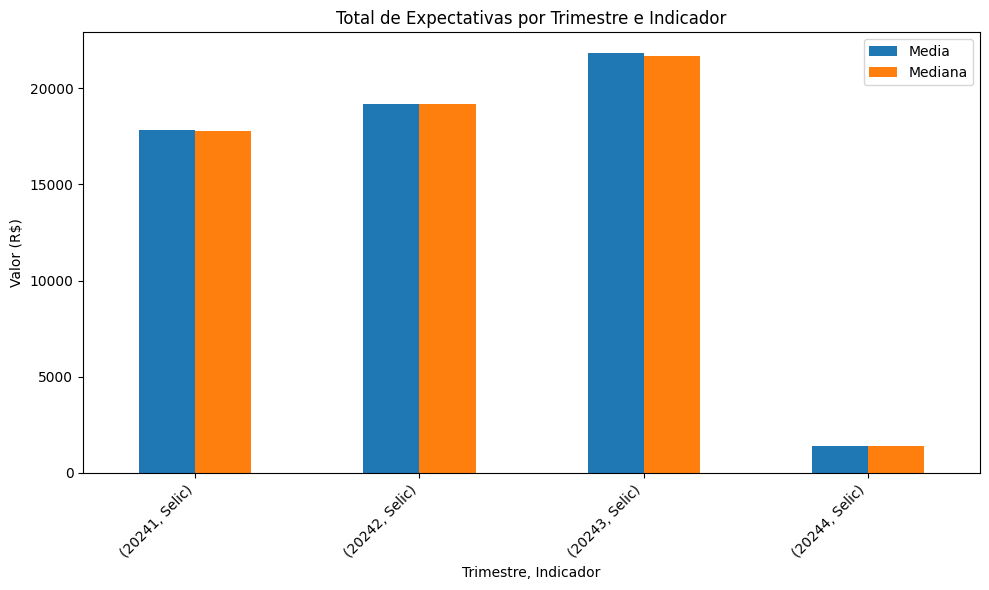

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df já esteja carregado

# Verifique as colunas do DataFrame
print(df.columns)

# Converter a coluna 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'])

# Criar a coluna 'trimestre' (Ajuste o formato conforme necessário)
df['trimestre'] = df['Data'].dt.to_period('Q').astype(str).str.replace('Q', '').astype(int)

# Filtrando dados para o último ano (20240)
df_last_year = df[df['trimestre'] >= 20240]

# Agrupando os dados (substitua 'Indicador' e 'Media' conforme apropriado)
df_last_year_grouped = df_last_year.groupby(['trimestre', 'Indicador'])[['Media', 'Mediana']].sum()

# Criar o gráfico
df_last_year_grouped.plot(kind='bar', figsize=(10, 6))

plt.title('Total de Expectativas por Trimestre e Indicador')
plt.ylabel('Valor (R$)')
plt.xlabel('Trimestre, Indicador')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


##CONSUMO DE API **IBGE**

#PMS VENDAS BRASIL

In [ ]:
import os
import pandas as pd

# Diretório onde o arquivo será salvo
directory = "datasets"

# Verifica se o diretório já existe, caso contrário, cria o diretório
if not os.path.exists(directory):
    os.makedirs(directory)

url ='https://servicodados.ibge.gov.br/api/v3/agregados/8688/periodos/201102-202407/variaveis/11623?localidades=N1[all]&classificacao=11046[56726]|12355[107071,106869,106874,31399,106876,31426]'
data = pd.read_json(url)

# Normalizar o JSON para um DataFrame
df = pd.json_normalize(data['resultados'][0])

# Criar um dicionário para armazenar as séries temporais com seus respectivos nomes de coluna
series_dict = {}

# Iterar sobre as classificações e séries
for i in range(len(df['classificacoes'])):
    # Extrair o nome da coluna
    nome_coluna = list(df['classificacoes'][i][1]['categoria'].values())[0]

    # Extrair os valores da série
    serie_valores = df['series'][i][0]['serie']

    # Adicionar a série ao dicionário
    series_dict[nome_coluna] = serie_valores

# Criar um DataFrame a partir do dicionário de séries
df_series = pd.DataFrame(series_dict)

# Adicionar a coluna de Data como índice (anos-meses)
df_series.index = df['series'][0][0]['serie'].keys()

# Certificar que o índice está no formato datetime para posterior análise
df_series.index = pd.to_datetime(df_series.index, format='%Y%m')

# Renomear o índice para "Data"
df_series.index.name = "Data"

# Exibir o DataFrame criado
display(df_series)

# Salvar o DataFrame em um CSV com a formatação brasileira
df_series.to_csv('datasets/pms_vendas.csv', encoding='utf-8-sig')

,Total,1. Serviços prestados às famílias,2. Serviços de informação e comunicação,"3. Serviços profissionais, administrativos e complementares","4. Transportes, serviços auxiliares aos transportes e correio",5. Outros serviços
Data,,,,,,
2011-02-01,0.1,0.5,1.3,1.1,0.0,-0.6
2011-03-01,-0.3,0.5,-1.0,0.2,-2.0,0.1
2011-04-01,0.8,3.1,1.7,0.3,0.7,-1.6
2011-05-01,0.5,-1.6,-0.2,0.8,0.6,2.9
2011-06-01,0.0,0.8,0.6,-0.5,-0.4,-2.3
...,...,...,...,...,...,...
2024-03-01,0.3,0.6,4.7,3.2,0.6,-0.1
2024-04-01,0.2,-3.4,0.3,-1.9,1.8,2.7
2024-05-01,-0.4,3.3,-1.0,-0.4,-1.5,-2.2


##VENDAS ESTADOS


In [ ]:
print(dados columns)

In [ ]:
import pandas as pd
import requests
from io import StringIO

# Função para extrair dados de uma URL
def extract_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        if "application/json" in response.headers["Content-Type"]:
            data = response.json()
            df = pd.DataFrame(data)
        elif "text/csv" in response.headers["Content-Type"]:
            data = StringIO(response.text)
            df = pd.read_csv(data)
        else:
            raise ValueError("Formato de dados não suportado!")
        return df
    except Exception as e:
        print(f"Erro ao extrair dados: {e}")
        return None

# Função para transformar os dados e adicionar colunas de Ano, Mês e Trimestre
def transform_data_with_date_filters(df, date_column):
    try:
        # Certificar-se de que a coluna de data está no formato datetime
        df[date_column] = pd.to_datetime(df[date_column])

        # Criar colunas separadas para Ano, Mês e Trimestre
        df['Ano'] = df[date_column].dt.year
        df['Mês'] = df[date_column].dt.month
        df['Trimestre'] = df[date_column].dt.quarter

        return df
    except Exception as e:
        print(f"Erro ao transformar os dados: {e}")
        return None

# URL de onde os dados serão extraídos
url = "https://servicodados.ibge.gov.br/api/v3/agregados/8695/periodos/201101-202407/variaveis/11623?localidades=N1[all]&classificacao=11046[56726]|12355[56724"  # Substituir pela URL real

# Nome da coluna que contém as datas (ajuste conforme o dataset)
date_column = "data"  # Substituir pelo nome real da coluna de datas

# Pipeline
if __name__ == "__main__":
    print("Iniciando o processo de extração e transformação...")

    # Etapa de Extração
    dados = extract_data(url)
    if dados is not None:
        print("Extração concluída com sucesso.")

        # Exibe os primeiros registros do DataFrame extraído
        print("Dados extraídos:")
        print(dados.head())

        # Etapa de Transformação
        if date_column in dados.columns:
            dados_transformados = transform_data_with_date_filters(dados, date_column)
            if dados_transformados is not None:
                print("Transformação concluída com sucesso.")

                # Exibe os dados transformados
                print("Dados transformados com colunas de Ano, Mês e Trimestre:")
                print(dados_transformados.head())

                # Salvar o DataFrame transformado (opcional)
                dados_transformados.to_csv("dados_transformados.csv", index=False, encoding="utf-8-sig")
                print("Dados transformados salvos como 'dados_transformados.csv'.")
            else:
                print("Erro durante a transformação dos dados.")
        else:
            print(f"Coluna '{date_column}' não encontrada nos dados extraídos.")
    else:
        print("Erro durante a extração dos dados.")


# PMS - LOCALIDADES

In [ ]:
import os
import pandas as pd

# Diretório onde o arquivo será salvo
directory = "datasets"

# Verifica se o diretório já existe, caso contrário, cria o diretório
if not os.path.exists(directory):
    os.makedirs(directory)

# URL do IBGE
url = 'https://servicodados.ibge.gov.br/api/v3/agregados/8693/periodos/201101-202407/variaveis/11623?localidades=N3[all]&classificacao=11046[56726]|12355[all]'

# Ler JSON da API
data = pd.read_json(url)

# Verificar se 'resultados' existe na estrutura da resposta
if 'resultados' in data.columns:
    resultados = data.loc[0, 'resultados']

    # Acessar o primeiro item da lista de 'resultados'
    if isinstance(resultados, list):
        resultados = resultados[0]  # Pegando o primeiro item da lista 'resultados'

        # Acessar as classificações e as séries
        series = resultados.get('series', [])

        # Criar um dicionário para armazenar as séries temporais com seus respectivos nomes de coluna
        series_dict = []

        # Mapeamento de estados para regiões
        regioes = {
            'Norte': ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
            'Nordeste': ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'],
            'Centro-Oeste': ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'],
            'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
            'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
        }

        # Iterar sobre as séries e extrair as categorias e os valores
        for serie_item in series:
            # A localidade (ex: 'Ceará') está em 'localidade' -> 'nome'
            localidade = serie_item['localidade']['nome']
            serie_data = serie_item.get('serie', {})

            # Identificar a região do estado
            regiao = next((r for r, estados in regioes.items() if localidade in estados), 'Desconhecido')

            # Adicionar os dados de série ao dicionário
            for periodo, valor in serie_data.items():
                if valor is not None:  # Apenas adicionar valores não nulos
                    series_dict.append({
                        'Estado': localidade,
                        'Região': regiao,
                        'Data': pd.to_datetime(periodo, format='%Y%m', errors='coerce'),
                        'Valor': valor
                    })

        # Criar DataFrame a partir da lista de dicionários
        if series_dict:
            df_series = pd.DataFrame(series_dict)

            # Converter a coluna "Data" para o formato dd/mm/yy
            df_series['Data'] = df_series['Data'].dt.strftime('%d/%m/%y')

            # Converter a coluna 'Valor' para tipo numérico (decimal)
            df_series['Valor'] = pd.to_numeric(df_series['Valor'], errors='coerce')

            # Garantir que os valores sejam interpretados corretamente como float
            df_series['Valor'] = df_series['Valor'].astype(float)

            # Remover períodos com valores ausentes
            df_series = df_series.dropna(subset=['Valor'])

            # Converter valores de ponto para vírgula
            df_series['Valor'] = df_series['Valor'].apply(lambda x: f"{x:.2f}".replace('.', ','))

            # Ordenar os dados por Data, Região e Estado
            df_series = df_series.sort_values(by=['Data', 'Região', 'Estado'])

            # Salvar o DataFrame em um arquivo CSV com formatação brasileira (para Power BI)
            df_series.to_csv(os.path.join(directory, 'pms_localidades.csv'), encoding='utf-8-sig', sep=';', index=False)

            display(df_series)

            print("Arquivo CSV gerado com sucesso!")
        else:
            print("Nenhum dado encontrado para criar o DataFrame.")
else:
    print("A chave 'resultados' não foi encontrada na estrutura da resposta.")

## PMS - CARGAS

In [ ]:
import os
import pandas as pd

# Diretório onde o arquivo será salvo
directory = "datasets"

# Verifica se o diretório já existe, caso contrário, cria o diretório
if not os.path.exists(directory):
    os.makedirs(directory)

# URL do IBGE para PMS - CARGAS
url = 'https://servicodados.ibge.gov.br/api/v3/agregados/8695/periodos/201101-202407/variaveis/11623?localidades=N1[all]&classificacao=11046[56726]|12355[56724]'

# Ler JSON da API
data = pd.read_json(url)

# Verificar se 'resultados' existe na estrutura da resposta
if 'resultados' in data.columns:
    resultados = data.loc[0, 'resultados']

    # Verificar se resultados é uma lista
    if isinstance(resultados, list) and resultados:
        resultados = resultados[0]  # Acessar o primeiro item

        # Obter as séries
        series = resultados.get('series', [])

        # Criar um dicionário para armazenar as séries temporais
        series_dict = []

        for serie_item in series:
            # Localidade (ex: Brasil)
            localidade = serie_item['localidade']['nome']
            serie_data = serie_item.get('serie', {})

            # Adicionar dados da série ao dicionário
            for periodo, valor in serie_data.items():
                # Tratar valores inválidos ou não numéricos como NaN
                valor_float = pd.to_numeric(valor, errors='coerce')
                # Validar valor e tratar nulos
                if valor == "..." or valor is None:
                    valor = None
                try:
                  data_formatada = pd.to_datetime(periodo, format='%Y%m', errors='coerce')
                except Exception as e:
                    print(f"Erro ao converter data {periodo}: {e}")
                    data_formatada = None
                # Adicionar dados ao dicionário
                series_dict.append({
                    'Data': periodo,
                    'Localidade': localidade,
                    'Valor': valor_float,
                })

        # Criar DataFrame a partir do dicionário
        if series_dict:
            df_series = pd.DataFrame(series_dict)

            # Ajustar o formato da data
            df_series['Data'] = pd.to_datetime(df_series['Data'], format='%Y%m', errors='coerce')
            df_series['Data'] = df_series['Data'].dt.strftime('%d/%m/%y')

            # Converter a coluna 'Valor' para tipo numérico (decimal)
            df_series['Valor'] = pd.to_numeric(df_series['Valor'], errors='coerce')

            # Garantir que os valores sejam interpretados corretamente como float
            df_series['Valor'] = df_series['Valor'].astype(float)

            # Remover períodos com valores ausentes
            df_series = df_series.dropna(subset=['Valor'])

            # Converter valores de ponto para vírgula
            df_series['Valor'] = df_series['Valor'].apply(lambda x: f"{x:.2f}".replace('.', ','))

            # Exibir o DataFrame final
            display(df_series)

            # Salvar o DataFrame em um arquivo CSV
            csv_path = os.path.join(directory, 'pms_cargas.csv')
            df_series.to_csv(csv_path, encoding='utf-8-sig', sep=';', index=False)
            print(f"Arquivo CSV salvo em: {csv_path}")
        else:
            print("Nenhum dado encontrado para criar o DataFrame.")
    else:
        print("Estrutura 'resultados' está vazia ou não é uma lista.")
else:
    print("A chave 'resultados' não foi encontrada na estrutura da resposta.")

